In [5]:
import datetime
print(f'Start Time = {datetime.datetime.now().time()}')

Start Time = 12:47:50.020386


In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
df=pd.read_csv("loan payments data.csv")
df0 = pd.read_csv("loan payments data.csv")
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


# Preprocessing

In [8]:
df.loc[df['loan_status'] == 'PAIDOFF', 'loan_status'] = '0'                                #encoding
df.loc[df['loan_status'] == 'COLLECTION', 'loan_status'] = '1'
df.loc[df['loan_status'] == 'COLLECTION_PAIDOFF', 'loan_status'] = '2'
df.loc[df['education'] == 'High School or Below', 'education'] = '0'
df.loc[df['education'] == 'college', 'education'] = '1'
df.loc[df['education'] == 'Bechalor', 'education'] = '2'
df.loc[df['education'] == 'Master or Above', 'education'] = '3'
df.loc[df['Gender'] == 'male', 'Gender'] = '1'
df.loc[df['Gender'] == 'female', 'Gender'] = '0'
df.loc[(df['Principal'] >= 300) & (df['Principal'] <= 650) , 'Principal'] = 0              # binning
df.loc[(df['Principal'] > 650), 'Principal'] = 1
df.loc[(df['terms'] >= 7) & (df['terms'] <= 15) , 'terms'] = 0
df.loc[(df['terms'] > 15) & (df['terms'] <= 22) , 'terms'] = 1
df.loc[df['terms'] > 22, 'terms'] = 2
df_change1 = df
#getting all the 3 different data
df_set1 = df_change1[(df_change1.index<=99) | (df_change1.index>=300)]
df_set2 = df_change1[((df_change1.index>=100) &(df_change1.index <= 199)) | (df_change1.index>=300)]
df_set3 = df_change1[((df_change1.index>=200) &(df_change1.index <= 299)) | (df_change1.index>=300)]
#combining all 3 sets to make a 900 samples dataset to ensure equal weightage given to all category
df_med = df_set1.append(df_set2)
dff = df_med.append(df_set3)
dff['loan_status'] = dff['loan_status'].astype(int)
dff['education'] = dff['education'].astype(int)
dff['Gender'] = dff['Gender'].astype(int)
dff['past_due_days'] = dff['past_due_days'].astype(object)
dff

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,0,1,2,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,0,1
1,xqd20168902,0,1,2,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,2,0
2,xqd20160003,0,1,2,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,2,0
3,xqd20160004,0,1,0,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,1,1
4,xqd20160005,0,1,2,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,2,1,2,9/12/2016,10/11/2016,10/14/2016 19:08,3,28,0,1
496,xqd20160497,2,1,0,9/12/2016,9/26/2016,10/10/2016 20:02,14,26,0,1
497,xqd20160498,2,1,0,9/12/2016,9/26/2016,9/29/2016 11:49,3,30,1,1
498,xqd20160499,2,1,2,9/12/2016,11/10/2016,11/11/2016 22:40,1,38,1,0


(6.0, 0.0)

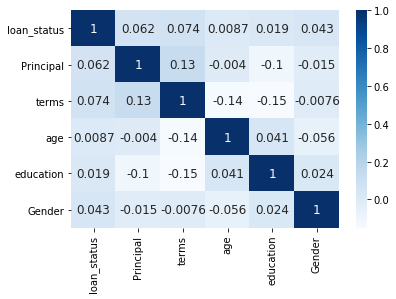

In [9]:
corrmat=dff.corr(method='pearson')
fig, ax = plt.subplots()
sns.heatmap(corrmat, annot=True, annot_kws={'size':12}, cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [10]:
df0.rename(columns={'loan_status':'Loan Status', 'terms':'Terms','effective_date':'Effective Date','due_date':'Due Date',
                    'paid_off_time':'Paid Off Time','past_due_days':'Past Due Days','age':'Age','education':'Education'}, inplace=True)
df0['Gender'] = df0['Gender'].replace('female','Female')
df0['Gender'] = df0['Gender'].replace('male','Male')
df0['Education'] = df0['Education'].replace('Bechalor','Bachelor')
df0['Education'] = df0['Education'].replace('college','College')
df0.head()

,Loan_ID,Loan Status,Principal,Terms,Effective Date,Due Date,Paid Off Time,Past Due Days,Age,Education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,Male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bachelor,Female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bachelor,Female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,College,Male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,College,Female


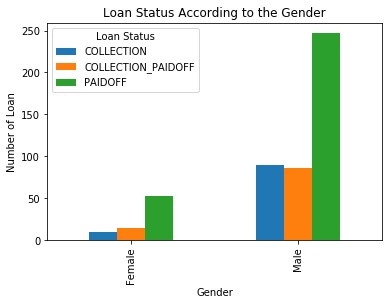

In [11]:
pd.crosstab(df0.Gender,df0['Loan Status']).plot(kind='bar')
plt.title('Loan Status According to the Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Loan')
plt.show()

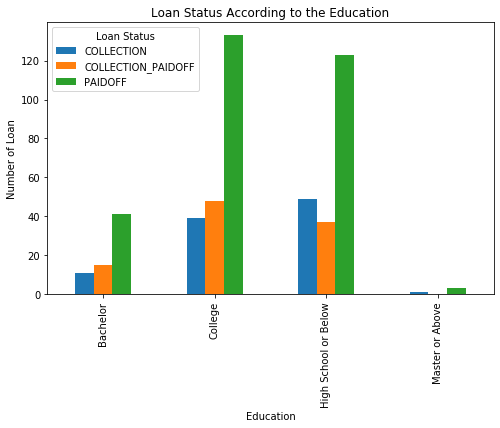

In [12]:
pd.crosstab(df0['Education'],df0['Loan Status']).plot(kind='bar',figsize=(8,5))
plt.title('Loan Status According to the Education')
plt.xlabel('Education')
plt.ylabel('Number of Loan')
plt.show()

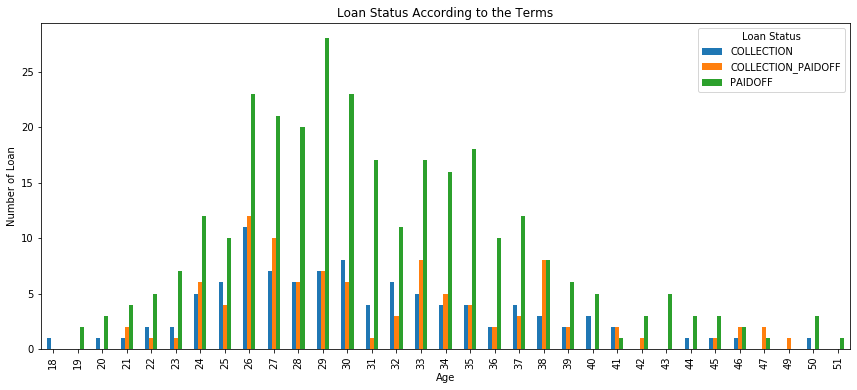

In [13]:
pd.crosstab(df0['Age'],df0['Loan Status']).plot(kind='bar',figsize=(14.5,6))
plt.title('Loan Status According to the Terms')
plt.ylabel('Number of Loan')
plt.xlabel('Age')
plt.show()

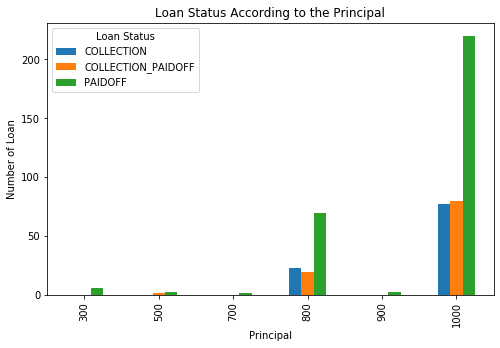

In [14]:
pd.crosstab(df0['Principal'],df0['Loan Status']).plot(kind='bar',figsize=(8,5))
plt.title('Loan Status According to the Principal')
plt.ylabel('Number of Loan')
plt.xlabel('Principal')
plt.show()

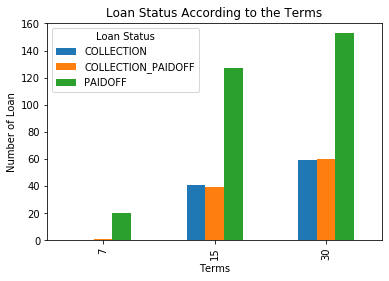

In [15]:
pd.crosstab(df0['Terms'],df0['Loan Status']).plot(kind='bar')
plt.title('Loan Status According to the Terms')
plt.ylabel('Number of Loan')
plt.xlabel('Terms')
plt.show()

# Data Dictionary

# LogReg Model with Original Dataset

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

logReg = LogisticRegression(solver = 'lbfgs', max_iter=500, multi_class='multinomial')
x2 = df[["Gender","age","education","Principal"]]
y2 = df['loan_status']
for i in range(1,150): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i)
    logReg.fit(x_train, y_train)  
    y_pred = logReg.predict(x_test) 
    if(accuracy_score(y_test, y_pred) > 0.69):
        print(f'{i} : {accuracy_score(y_test, y_pred)}')                                                       
    
x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = 84)
logReg.fit(x_train, y_train) 
y_pred = logReg.predict(x_test)
print(f'Highest Accuracy : {round((accuracy_score(y_test, y_pred) * 100),2)} %')

84 : 0.704
101 : 0.696
Highest Accuracy : 70.4 %


In [26]:
cm2=confusion_matrix(y_test,y_pred)
print(cm2)
#model is predicting all to be category 0 due to the imbalance dataset

[[34  4 29]
 [32 25 29]
 [18 17 37]]


# LogReg Model Training & Prediction with Modified Dataset

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression(solver = 'lbfgs', max_iter=500, multi_class='multinomial')

x = dff[["Gender","age","education","Principal"]]
y = dff['loan_status']

In [19]:
from sklearn.metrics import accuracy_score                              
for i in range(1,150): 
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i)
    logReg.fit(x_train, y_train)  
    y_pred = logReg.predict(x_test) 
    if(accuracy_score(y_test, y_pred) > 0.42):
        print(f'{i} : {accuracy_score(y_test, y_pred)}')                                                       
    
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 97)
logReg.fit(x_train, y_train) 
y_pred = logReg.predict(x_test)
print(f'Highest Accuracy : {round((accuracy_score(y_test, y_pred) * 100),2)} %')

45 : 0.4222222222222222
97 : 0.4311111111111111
146 : 0.4266666666666667
Highest Accuracy : 43.11 %


In [20]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[18 31 30]
 [ 9 42 27]
 [10 21 37]]


# Using PCA before LogReg

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

for j in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(principalDf, y, random_state = j)
    logReg.fit(x_train, y_train)
    y_predict = logReg.predict(x_test)
    if(accuracy_score(y_test, y_predict) > 0.37):
        print(f'{j} : {accuracy_score(y_test, y_predict)}')

x_train, x_test, y_train, y_test = train_test_split(principalDf, y, random_state = 78)
logReg.fit(x_train, y_train) 
y_predict = logReg.predict(x_test)
print(f'Highest Accuracy : {round((accuracy_score(y_test, y_predict)) * 100,2)} %')

72 : 0.37777777777777777
78 : 0.37777777777777777
Highest Accuracy : 37.78 %


# Cross Validation (K-Fold)

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

logr = LogisticRegression(solver = 'lbfgs', max_iter=500, multi_class='multinomial')
scoring = 'accuracy'
score = cross_val_score(logr, x, y, cv = k_fold, n_jobs = 1, scoring = scoring)
print(f'Highest Accuracy : {round((score.max() * 100),2)} %')
print(f'Mean : {round(np.mean(score) * 100, 2)}')

Highest Accuracy : 41.11 %
Mean : 36.67


# LogReg Model Training and Prediction using MinMaxScaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfmm = dff
x = dfmm[["Principal"]].values
x_scaled = scaler.fit_transform(x)
dfmm["Principal"] = x_scaled

x = dfmm[["terms"]].values
x_scaled = scaler.fit_transform(x)
dfmm["terms"] = x_scaled

x = dfmm[["age"]].values
x_scaled = scaler.fit_transform(x)
dfmm["age"] = x_scaled

dfmm.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,0,1.0,1.0,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,0.818182,0,1
1,xqd20168902,0,1.0,1.0,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,0.969697,2,0
2,xqd20160003,0,1.0,1.0,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,0.454545,2,0
3,xqd20160004,0,1.0,0.0,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,0.272727,1,1
4,xqd20160005,0,1.0,1.0,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,0.303030,1,0


In [24]:
x2 = dfmm[['Gender',"age","education","terms","Principal"]]
y2 = dfmm['loan_status']
for i in range(1,100): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i)
    logReg.fit(x_train, y_train)  
    y_pred = logReg.predict(x_test) 
    if(accuracy_score(y_test, y_pred) > 0.4):
        print(f'{i} : {accuracy_score(y_test, y_pred)}')                                                       
    
x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = 63)
logReg.fit(x_train, y_train) 
y_pred = logReg.predict(x_test)
print(f'Highest Accuracy : {round((accuracy_score(y_test, y_pred) * 100),2)} %')

4 : 0.40444444444444444
14 : 0.4177777777777778
54 : 0.40444444444444444
63 : 0.4266666666666667
64 : 0.40444444444444444
Highest Accuracy : 42.67 %


In [25]:
print(f'End Time = {datetime.datetime.now().time()}')

End Time = 12:48:42.112104
